# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [8]:
X = data.drop('MEDV', axis=1)
y = data.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [38]:
model.score(X_train,y_train)

0.7508856358979673

In [39]:
model.score(X_test, y_test)

0.6687594935356309

## 4. Calculate and print mean squared error for both the training and the testing set.

In [30]:
mean_squared_error(y_train, y_train_pred)

21.641412753226312

In [31]:
mean_squared_error(y_test, y_test_pred)

24.2911194749736

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [33]:
mean_absolute_error(y_train, y_train_pred)

3.3147716267832252

In [35]:
mean_absolute_error(y_test, y_test_pred)

3.189091965887851

## Classification Model Evaluation

In [36]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [41]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [42]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [45]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [55]:
accuracy_score(y_train, y_train_pred)

0.9583333333333334

In [56]:
accuracy_score(y_test, y_test_pred)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [53]:
balanced_accuracy_score(y_train, y_train_pred)

0.9589326662497394

In [54]:
balanced_accuracy_score(y_test, y_test_pred)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [60]:
precision_score(y_train, y_train_pred, average='macro')

0.9594820384294068

In [62]:
precision_score(y_test, y_test_pred, average='macro')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [66]:
recall_score(y_train, y_train_pred, average='macro')

0.9589326662497394

In [67]:
recall_score(y_test, y_test_pred, average='macro')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [68]:
f1_score(y_train, y_train_pred, average='macro')

0.9583268218992552

In [69]:
f1_score(y_test, y_test_pred, average='macro')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

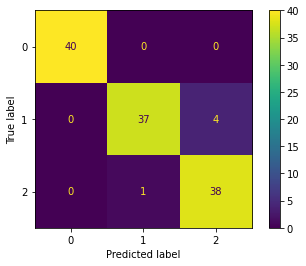

In [72]:
plot_confusion_matrix(model, X_train, y_train)

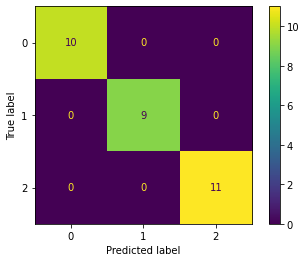

In [73]:
plot_confusion_matrix(model, X_test, y_test)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.